In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


from IPython.display import clear_output, display, Math, Latex


In [13]:
dataset = pd.read_csv('Datasets/Titanic/train.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
dataset.loc[:,]

In [51]:
def one_hot(Y,n_class):
    length = np.shape(Y)[1]
    O = np.zeros((n_class,length))
    for i in range(length):
        j = int(Y[0,i])
        O[j,i] = 1
    return O

def inv_one_hot(O):
    n_class = np.shape(O)[0]
    length = np.shape(O)[1]
    Y = np.zeros((1,length))
    for i in range(length):
        j = np.argmax(O[:,i])
        Y[0,i] = j
    return Y

In [70]:
X = np.array(range(1,101))
Y = np.array([1,0]*50)
X_test = np.array(range(101,121))
Y_test = np.array([1,0]*20)
X = np.expand_dims(X,0)
Y = np.expand_dims(Y,0)
X_test = np.expand_dims(X_test,0)
Y_test = np.expand_dims(Y_test,0)
Y = one_hot(Y,2)
Y_test = one_hot(Y_test,2)

In [71]:
def normalize(X):
    mean = np.mean(X)
    std =  np.std(X)
    N_X = (X-mean)/(std)
    return N_X

def model_accuracy(H,Y):
    n = np.shape(H)[1]
    err = 0
    for i in range(n):
        if H[0,i]!=Y[0,i]:
            err += 1
    accuracy = (1 - err/n)
    return accuracy

In [72]:
class sigmoid:
    def activate(Z):
        A = 1/(1+np.exp(-Z))
        return A
    
    def diff(self,Z):
        dsig = np.multiply(self.activate(Z),(1-self.activate(Z)))
        return dsig
    
class relu:
    def activate(Z):
        A = Z*(Z>0)
        return A
    
    def diff(self,Z):
        d_rel = 1*(Z>0)
        return d_rel
    
# wrong implementation of leaky
class leaky_relu:
    def activate(Z):
        A = Z if (Z.all()>0.001*Z.all()) else 0.001*Z
        return A
    
    def diff(self,Z):
        d_lrel = 1 if (Z.all()>0.001*Z.all()) else 0.001
        return d_lrel
    
class tanh:
    def activate(Z):
        A = np.tanh(Z)
        return A

    def diff(self,Z):
        d_tanh = 1 - (np.multiply(self.activate(Z),self.activate(Z)))
        return d_tanh
    
class softmax:
    """Compute softmax values for each sets of scores in x."""
    def activate(Z):
        e_Z = np.exp(Z- np.max(Z,axis=0))
        return e_Z / e_Z.sum(axis=0)
    
    def diff(Z):
        return Z
    
class CE_loss:
    def get_loss(H,Y):
        L = -np.mean(np.multiply(Y,np.log(H)))
        return L
    
    def diff(H,Y):
        dZ = H - Y 
        return dZ

In [73]:
#Initialize Matrix
def init_theta(n1,n2,activation):
    if activation in [sigmoid,softmax]:
        M = np.random.randn(n2,n1)*np.sqrt(2./n1)
    elif activation in [relu,leaky_relu] :
        M = np.random.randn(n2,n1)*np.sqrt(1./n1)
    elif activation == tanh:
        M = np.random.randn(n2,n1)*np.sqrt(1./(n1+n2))
    return M

In [74]:
class layer:
    def __init__(self, n_prev, n_next, activation):
        self.W = init_theta(n_prev, n_next, activation)
        self.B = init_theta(1, n_next, activation)
        self.activation = activation
        self.V_dW = np.zeros(self.W.shape)
        self.V_dB = np.zeros(self.B.shape)
        
    def forward(self, A0):
        self.Z = np.dot(self.W, A0) + self.B
        self.A = self.activation.activate(self.Z)
        return self.A
    
    def grad(self, dZ, W, A0, m):
        dA = np.dot(W.T, dZ)
        dAdZ = self.activation.diff(self.activation, self.Z)
        self.dZ = np.multiply(dA, dAdZ)
        self.dW = (1./m)*np.dot(self.dZ, A0.T)
        self.dB = (1./m)*(np.sum(self.dZ, axis=1, keepdims=True))
    
    def out_grad(self, dZ, A0, m):
        self.dZ = dZ
        self.dW = (1./m)*np.dot(self.dZ, A0.T)
        self.dB = (1./m)*(np.sum(self.dZ, axis=1, keepdims=True))
        
    def optim(self, lr, beta):
        self.V_dW = (beta * self.V_dW + (1. - beta) * self.dW)
        self.V_dB = (beta * self.V_dB + (1. - beta) * self.dB)
        self.W = self.W - lr*self.V_dW
        self.B = self.B - lr*self.V_dB

In [75]:
class classifier:
    def __init__(self, X_size, Y_size, lossfn):    
        self.L1 = layer(X_size, Y_size, softmax)
        self.lossfn = lossfn
        
    def f_pass(self, X):
        A1 = self.L1.forward(X)
        self.H = A1
        return self.H
    
    def back_prop(self,X,Y, batch_size):
        m = batch_size
        self.loss = self.lossfn.get_loss(self.H,Y)
        dZ = self.lossfn.diff(self.H,Y)
        self.L1.out_grad(dZ, X, m)
    
    def step(self, lr, beta=0):
        self.L1.optim(lr,beta)

In [76]:
def SGD(batch_size,X,Y,model,lr,beta):
    m = np.shape(X)[0]
    for i in range(0,m,batch_size):
        X_batch = X[:, i:i+batch_size]
        Y_batch = Y[:, i:i+batch_size]
        model.f_pass(X_batch)
        model.back_prop(X_batch,Y_batch,batch_size)
        model.step(lr,beta)
    return model.loss

In [77]:
#Model creation
n_in = np.shape(X)[0]
n_out = np.shape(Y)[0]
mnist_net = classifier(n_in,n_out,CE_loss)

In [99]:
mnist_net.f_pass(X)
mnist_net.back_prop(X,Y,100)
mnist_net.loss

/home/agopal/anaconda3/envs/onlinepub/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/agopal/anaconda3/envs/onlinepub/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


nan

In [97]:
#Hyperparameters
batch_size = 10
lr = 1000
n_epochs = 100
lr_decay = 1
beta = 1

epoch:100/100 | Loss:nan | Train Accuracy: 0.5000 | Test_Accuracy:0.5000


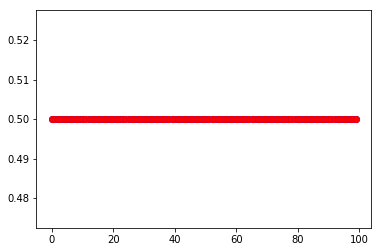

In [98]:
for e in range(n_epochs):
    #shuffle dataset
    #SGD with momentum
    loss = SGD(batch_size,X,Y,mnist_net,lr,beta)
    
    lr = lr*lr_decay
    
    H = mnist_net.f_pass(X)
    O = inv_one_hot(H)
    L = inv_one_hot(Y)
    tr_acc = model_accuracy(O,L)
    
    H = mnist_net.f_pass(X_test)
    O = inv_one_hot(H)
    L = inv_one_hot(Y_test)
    acc = model_accuracy(O,L)
    
    plt.plot(e,tr_acc, 'bo')
    plt.plot(e,acc,'ro')
    clear_output()
    print(f"epoch:{e+1}/{n_epochs} | Loss:{loss:.4f} | Train Accuracy: {tr_acc:.4f} | Test_Accuracy:{acc:.4f}")

plt.show()